## BCCWJ

In [11]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statistics import mean
from collections import defaultdict
from scipy.stats import spearmanr
%matplotlib inline

pd.set_option('display.max_rows', None)
plt.rcParams['font.family'] = 'IPAexGothic'
palette = sns.color_palette("viridis_r", 10)

sns.set(font_scale=2)
sns.set('talk', 'whitegrid', 'dark',
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})

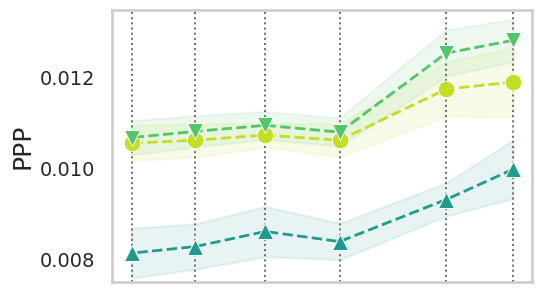

In [12]:
plt.rcParams["figure.figsize"] = (6, 4)

cl2avgcl_bunsetsu = {2:2.8399269628727937, 3:5.2574558734023125, 5:9.091905051734631, 7:11.765672550213026, 10:14.285453438831405, 1000:16.5830797321972}
for cl, avg in cl2avgcl_bunsetsu.items():
    plt.axvline(x=avg, linestyle=':', alpha=1, linewidth=1.4, color="dimgray")


df = pd.read_csv('../surprisals/BE/aggregated.txt')
df = df[(df['context_func']=='delete') & (df['context_l']!=20)] # n=20 nearly equals to n=1000 in Japanese settings 
trans_df = df[df['arch']=='transformer']
gpt_df = df[df['arch']=='gpt']
lstm_df = df[df['arch']=='lstm']

ax = sns.lineplot(x=[cl2avgcl_bunsetsu[l] for l in lstm_df["context_l"]], y =lstm_df["delta_linear_fit_logLik"], alpha=1, ci='sd', label='LSTM-xs-Wiki', linestyle="--", color=palette[0], marker="o", markersize=12)
sns.lineplot(x=[cl2avgcl_bunsetsu[l] for l in gpt_df["context_l"]], y =gpt_df["delta_linear_fit_logLik"], alpha=1, ci='sd', ax=ax, label='GPT2-xs-WIki', linestyle="--", color=palette[2], marker="v", markersize=12)
sns.lineplot(x=[cl2avgcl_bunsetsu[l] for l in trans_df["context_l"]], y =trans_df["delta_linear_fit_logLik"], alpha=1, ci='sd', ax=ax, label='GPT2-sm-WIki', linestyle="--", color=palette[4], marker="^", markersize=12)
plt.setp(ax.collections[0], alpha=0.1)
plt.setp(ax.collections[1], alpha=0.1)
plt.setp(ax.collections[2], alpha=0.1)


ax.set_ylabel('PPP',fontsize=18)
ax.tick_params(labelbottom=False,
               labelleft=True,
               labelright=False,
               labeltop=False)

ax.grid(False)
ax.set_ylim([0.0075, 0.0135])
fig = ax.get_figure()
fig.subplots_adjust(left=0.2, bottom=0.2)
fig.patch.set_alpha(0)
plt.yticks(fontsize=14)
plt.legend('',frameon=False)
plt.gca().invert_xaxis()

Text(0, 0.5, '')

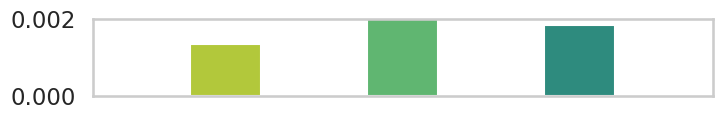

In [13]:
plt.rcParams["figure.figsize"] = (8,1)
bigram = df[df['context_l']==2][['delta_linear_fit_logLik', 'arch']].groupby('arch').mean()
fullgram = df[df['context_l']==1000][['delta_linear_fit_logLik', 'arch']].groupby('arch').mean()
df_bar = (bigram - fullgram)
df_bar = pd.DataFrame(df_bar.to_records())
df_bar = pd.concat([df_bar, pd.DataFrame([{'arch': 'dumy', 'delta_linear_fit_logLik': 0}])])

ax = sns.barplot(x='arch', y='delta_linear_fit_logLik', data=df_bar,  palette=[palette[0], palette[0], palette[0], palette[2],palette[0], palette[4], palette[0]], order=['dummy', 'lstm', 'dummy', 'gpt', 'dummy', 'transformer', 'dummy'])
ax.grid(False)
ax.set_ylim([0, 0.002])
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
plt.legend('',frameon=False)
plt.xlabel('')
plt.ylabel('')

In [14]:
lstm_delta = df_bar[df_bar['arch']=='lstm']['delta_linear_fit_logLik'].to_list()[0]
gpt_delta = df_bar[df_bar['arch']=='gpt']['delta_linear_fit_logLik'].to_list()[0]
transformer_delta = df_bar[df_bar['arch']=='transformer']['delta_linear_fit_logLik'].to_list()[0]
spearmanr([lstm_delta, gpt_delta, transformer_delta], [0,1,2])

SpearmanrResult(correlation=0.5, pvalue=0.6666666666666667)

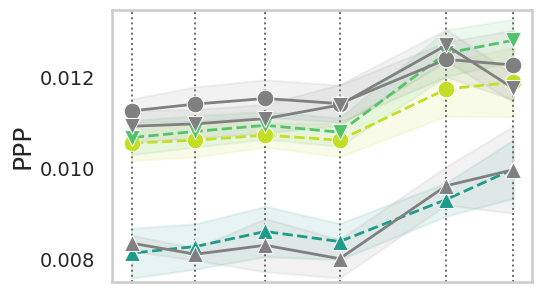

In [16]:
plt.rcParams["figure.figsize"] = (6, 4)

cl2avgcl_bunsetsu = {2:2.8399269628727937, 3:5.2574558734023125, 5:9.091905051734631, 7:11.765672550213026, 10:14.285453438831405, 1000:16.5830797321972}
for cl, avg in cl2avgcl_bunsetsu.items():
    plt.axvline(x=avg, linestyle=':', alpha=1, linewidth=1.4, color="dimgray")

arch2correl = defaultdict(list)
df = pd.read_csv('../surprisals/BE/aggregated.txt')
df = df[(df['context_func']=='delete') & (df['context_l']!=20)]
trans_df = df[df['arch']=='transformer']
gpt_df = df[df['arch']=='gpt']
lstm_df = df[df['arch']=='lstm']
arch2correl['trans'].append(trans_df[['delta_linear_fit_logLik', 'context_l']].corr(method='spearman')['context_l'][0])
arch2correl['lstm'].append(lstm_df[['delta_linear_fit_logLik', 'context_l']].corr(method='spearman')['context_l'][0])
arch2correl['gpt'].append(gpt_df[['delta_linear_fit_logLik', 'context_l']].corr(method='spearman')['context_l'][0])

ax = sns.lineplot(x=[cl2avgcl_bunsetsu[l] for l in lstm_df["context_l"]], y =lstm_df["delta_linear_fit_logLik"], alpha=1, ci='sd', label='LSTM-xs-Wiki', linestyle="--", color=palette[0], marker="o", markersize=12)
sns.lineplot(x=[cl2avgcl_bunsetsu[l] for l in gpt_df["context_l"]], y =gpt_df["delta_linear_fit_logLik"], alpha=1, ci='sd', ax=ax, label='GPT2-xs-WIki', linestyle="--", color=palette[2], marker="v", markersize=12)
sns.lineplot(x=[cl2avgcl_bunsetsu[l] for l in trans_df["context_l"]], y =trans_df["delta_linear_fit_logLik"], alpha=1, ci='sd', ax=ax, label='GPT2-sm-WIki', linestyle="--", color=palette[4], marker="^", markersize=12)
plt.setp(ax.collections[0], alpha=0.1)
plt.setp(ax.collections[1], alpha=0.1)
plt.setp(ax.collections[2], alpha=0.1)

df = pd.read_csv('../surprisals/BE-vanilla/aggregated.txt')
df = df[(df['context_func']=='delete') & (df['context_l']!=20)]
trans_df = df[df['arch']=='transformer']
gpt_df = df[df['arch']=='gpt']
lstm_df = df[df['arch']=='lstm']
arch2correl['trans'].append(trans_df[['delta_linear_fit_logLik', 'context_l']].corr(method='spearman')['context_l'][0])
arch2correl['lstm'].append(lstm_df[['delta_linear_fit_logLik', 'context_l']].corr(method='spearman')['context_l'][0])
arch2correl['gpt'].append(gpt_df[['delta_linear_fit_logLik', 'context_l']].corr(method='spearman')['context_l'][0])

sns.lineplot(x=[cl2avgcl_bunsetsu[l] for l in lstm_df["context_l"]], y =lstm_df["delta_linear_fit_logLik"], alpha=1, ci='sd', ax=ax, label='LSTM-xs-Wiki (vanilla)', linestyle="-", color="gray", marker="o", markersize=12)
sns.lineplot(x=[cl2avgcl_bunsetsu[l] for l in gpt_df["context_l"]], y =gpt_df["delta_linear_fit_logLik"], alpha=1, ci='sd', ax=ax, label='GPT2-xs-Wiki (vanilla)', linestyle="-", color="gray", marker="v", markersize=12)
sns.lineplot(x=[cl2avgcl_bunsetsu[l] for l in trans_df["context_l"]], y =trans_df["delta_linear_fit_logLik"], alpha=1, ci='sd', ax=ax, label='GPT2-sm-Wiki (vanilla)', linestyle="-", color="gray", marker="^", markersize=12)
plt.setp(ax.collections[3], alpha=0.1)
plt.setp(ax.collections[4], alpha=0.1)
plt.setp(ax.collections[5], alpha=0.1)

ax.set_ylabel('PPP',fontsize=18)
ax.tick_params(labelbottom=False,
               labelleft=True,
               labelright=False,
               labeltop=False)

ax.grid(False)
ax.set_ylim([0.0075, 0.0135])
fig = ax.get_figure()
fig.subplots_adjust(left=0.2, bottom=0.2)
fig.patch.set_alpha(0)
plt.yticks(fontsize=14)
plt.legend('',frameon=False)
plt.gca().invert_xaxis()

In [17]:
context_l = [2, 3, 5, 7, 10, 20]
noise_p = [0.5, 0.25, 0.125, 0.0625]

lp2cl = {}
for l in context_l:
    for p in noise_p:
        data = json.load(open(f'../data/BE/ngram_{str(l)}-contextfunc_lossy-{str(p)}.json'))
        cl = mean([len(c.split(' ')) for doc_id, text in data.items() for c, w in text])
        lp2cl[str(l) + '-' + str(p)] = cl
        

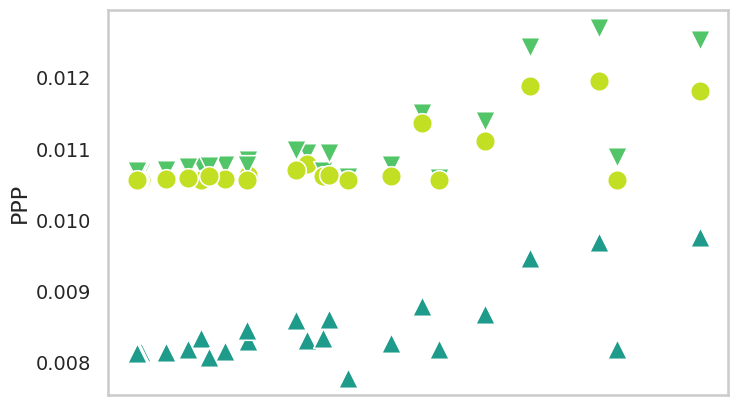

In [18]:
plt.rcParams["figure.figsize"] = (8,5)

df = pd.read_csv('../surprisals/BE/aggregated.txt')
trans_df = df[df['arch']=='transformer']
lstm_df = df[df['arch']=='lstm']
gpt_df = df[df['arch']=='gpt']
lossy_ja_df = df[['delta_linear_fit_logLik', 'context_l', 'context_func', 'arch']].groupby(['context_l', 'context_func', 'arch']).describe().sort_values(('delta_linear_fit_logLik', 'mean'), ascending=False)
lossy_ja_df = lossy_ja_df['delta_linear_fit_logLik'].reset_index()

arch = ['transformer', 'gpt', 'lstm']
palette = sns.color_palette("viridis_r", 10)
arch2color = {'lstm': palette[0], 'gpt': palette[2], 'transformer': palette[4]}
arch2marker = {'transformer': '^', 'lstm': 'o', 'gpt': 'v'}

for l in context_l:
    for p in noise_p:
        for a in arch:
            result = lossy_ja_df[(lossy_ja_df['context_l'] == l) & (lossy_ja_df['context_func']==f'lossy-{str(p)}') & (lossy_ja_df['arch']==a)]
            ppp = result['mean'].to_list()[0]
            cl = lp2cl[str(l) + '-' + str(p)]
            ax = sns.scatterplot(x=[cl], y=[ppp], color=arch2color[a], marker=arch2marker[a], s=200)

ax.set_ylabel('PPP',fontsize=16)
ax.grid(False)
ax.tick_params(labelbottom=False,
               labelleft=True,
               labelright=False,
               labeltop=False)
plt.yticks(fontsize=14)
plt.gca().invert_xaxis()

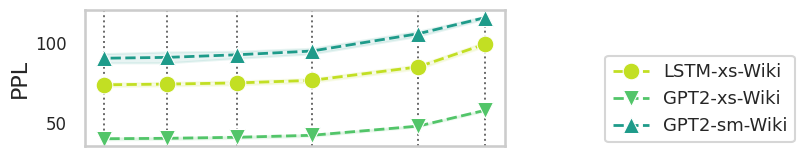

In [19]:
plt.rcParams["figure.figsize"] = (6, 2)
cl2avgcl_bunsetsu = {2:2.8399269628727937, 3:5.2574558734023125, 5:9.091905051734631, 7:11.765672550213026, 10:14.285453438831405, 1000:16.5830797321972}

for cl, avg in cl2avgcl_bunsetsu.items():
    plt.axvline(x=avg, linestyle=':', alpha=1, linewidth=1.4, color="dimgray")
plt.yticks(fontsize=12)
plt.gca().invert_xaxis()


df = pd.read_csv('../surprisals/BE/aggregated.txt')
df = df[(df['context_func']=='delete') & (df['context_l']!=20)]
trans_df = df[df['arch']=='transformer']
gpt_df = df[df['arch']=='gpt']
lstm_df = df[df['arch']=='lstm']

ax = sns.lineplot(x=[cl2avgcl_bunsetsu[l] for l in lstm_df["context_l"]], y =lstm_df["PPL"], alpha=1, ci='sd', label='LSTM-xs-Wiki', linestyle="--", color=palette[0], marker="o", markersize=12)
sns.lineplot(x=[cl2avgcl_bunsetsu[l] for l in gpt_df["context_l"]], y =gpt_df["PPL"], alpha=1, ci='sd', ax=ax, label='GPT2-xs-Wiki', linestyle="--", color=palette[2], marker="v", markersize=12)
sns.lineplot(x=[cl2avgcl_bunsetsu[l] for l in trans_df["context_l"]], y =trans_df["PPL"], alpha=1, ci='sd', ax=ax, label='GPT2-sm-Wiki', linestyle="--", color=palette[4], marker="^", markersize=12)
plt.setp(ax.collections[0], alpha=0.1)
plt.setp(ax.collections[1], alpha=0.1)
plt.setp(ax.collections[2], alpha=0.1)

ax.set_ylabel('PPL',fontsize=16)
ax.tick_params(labelbottom=False,
               labelleft=True,
               labelright=False,
               labeltop=False)

ax.grid(False)
fig = ax.get_figure()
fig.subplots_adjust(left=0.2, bottom=0.2)
plt.legend(bbox_to_anchor=(1.7, 0), loc='lower right', borderaxespad=0.2, fontsize=13)

Text(0, 0.5, 'PPP')

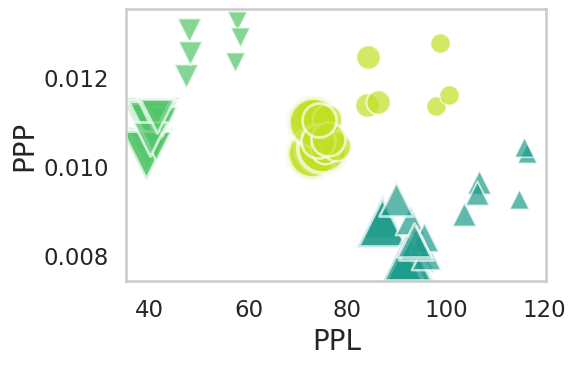

In [20]:
plt.rcParams["figure.figsize"] = (6, 4)

arch2color = {'transformer': 4, 'lstm': 0, 'gpt': 2}
context2size = {'2': 200, '3': 300, '5': 450, '7': 600, '10': 900, '20': 1250, '1000': 1500}
arch2marker = {'transformer': '^', 'lstm': 'o', 'gpt': 'v'}

df = pd.read_csv('../surprisals/BE/aggregated.txt')
df = df[(df['context_func']=='delete')]
for k, r in df.iterrows():
    ax = sns.scatterplot(x=[r['PPL']], y=[r['delta_linear_fit_logLik']], 
                    marker=arch2marker[r['arch']], s=context2size[str(r['context_l'])], 
                    color=palette[arch2color[r['arch']]], alpha=0.7)
df1 = df
trans_df = df[df['arch']=='transformer']
gpt_df = df[df['arch']=='gpt']
lstm_df = df[df['arch']=='lstm']

plt.grid(False)
fig = ax.get_figure()
fig.subplots_adjust(left=0.2, bottom=0.2)
fig.patch.set_alpha(0)
plt.xlabel('PPL',fontsize=20)
plt.ylabel('PPP',fontsize=20)

In [22]:
import glob
import ast

files = glob.glob('../surprisals/BE/*2-*delete/**/residual.txt', recursive=True)
dfs = []
for i, file in enumerate(files):
    if i == 0:
        df = pd.read_csv(file)
    else:
        df = pd.read_csv(file)[['residual']]
    dfs.append(df)
df_close = pd.concat(dfs, axis=1)

files = glob.glob('../surprisals/BE/*1000*delete/**/residual.txt', recursive=True)
dfs = []
for i, file in enumerate(files):
    if i == 0:
        df = pd.read_csv(file)
    else:
        df = pd.read_csv(file)[['residual']]
    dfs.append(df)
df_far = pd.concat(dfs, axis=1)

df_ja = pd.read_csv('../data/BE/fpt-log.csv.annotation.filtered.csv.data4modeling', delimiter="\t")
df_ja['diff_residual'] = (df_close['residual'] - df_far['residual']).T.mean().tolist()
df_ja['pos'] = df_ja['pos'].map(ast.literal_eval).map(lambda x: x[0])
df_ja['dep_rel'] = df_ja['dep_rel'].map(ast.literal_eval)
df_ja = df_ja[df_ja['tokenN']>6]

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

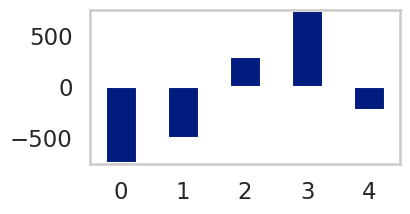

In [23]:
key = 'avg_locality'
df_dep = df_ja[[key, 'diff_residual']].copy()
df_dep[key] = df_dep[key].astype('int')
quantile = int(df_dep[key].quantile(0.95))
df_dep = df_dep[df_dep[key]<quantile]
df_dep.groupby('avg_locality').mean().plot(kind="bar", figsize=(4,2))
plt.legend('',frameon=False)
plt.ylim(-750,750)
plt.xlabel('')
plt.grid(False)
plt.xticks(rotation=0)

194
135
324


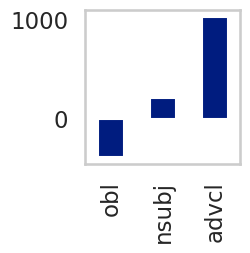

In [24]:
ax = None
markers = ["o", "^", "v", "<", ">", "d", "D", "+", "x", "*", "h", "H"]
i = 0
dr2color = lambda x: "red" if x=="advcl_dist" or x=="acl_dist" else "gray"
dr2line = lambda x: "-" if x=="advcl_dist" or x=="acl_dist" else "--"

dep_rel_list = ['ccomp', 'obj', 'mark', 'case', 'nmod', 'root', 'compound', 'obl', 'csubj', 'dep', 'advmod', 'punct', 'fixed', 'advcl', 'acl', 'nsubj', 'cop', 'amod', 'aux']
dep2lce = {}
dep2locality = {}

for dep in dep_rel_list:
    key=f'{dep}_dist'
    df_dep = df_ja.copy()
    df_dep = df_dep[df_dep[key]<200]
    df_dep[key] = df_dep[key].astype('int')
    df_dep_long = df_dep[df_dep[key]>4]
    df_dep_short = df_dep[(df_dep[key]<3) & df_dep[key]>0]
    if len(df_dep_long) < 40:
        continue
    print(len(df_dep_long))
    dep2lce[key] = df_dep_long['diff_residual'].mean()
    dep2locality[key] = df_dep_long[key].mean()
    
keys = map(lambda x: x[0].replace('_dist', ''), dep2lce.items())
values = map(lambda x: x[1], dep2lce.items())
localities = map(lambda x: x[1], dep2locality.items())

pd.DataFrame.from_dict({'pos': keys, 'diff_residual': values, 'locality': localities}).sort_values(by='diff_residual').plot(kind="bar", x='pos', y='diff_residual', figsize=(2,2))
plt.legend('',frameon=False)
plt.xlabel('')
plt.grid(False)

In [26]:
from scipy.stats import ttest_ind, f_oneway

print(f_oneway(df_ja[df_ja['nsubj_dist']>4]['diff_residual'], df_ja[df_ja['obl_dist']>4]['diff_residual'], df_ja[df_ja['advcl_dist']>4]['diff_residual']))
print(ttest_ind(df_ja[df_ja['advcl_dist']>4]['diff_residual'], df_ja[df_ja['obl_dist']>4]['diff_residual']))

F_onewayResult(statistic=3.2674243331089565, pvalue=0.038731235548734415)
Ttest_indResult(statistic=2.3492010389891402, pvalue=0.019408345817991283)


## Dundee GPT2

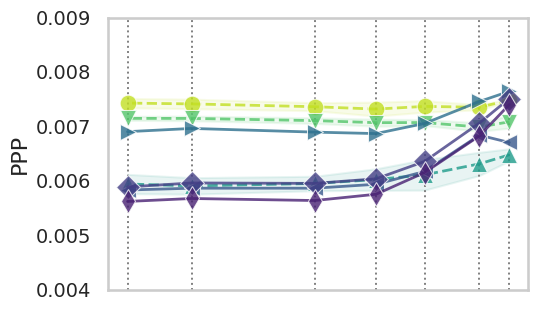

In [28]:
plt.rcParams["figure.figsize"] = (6,4)

cl2avgcl_bunsetsu = {2:1.1867536552688298, 3:2.3106541620551058, 5:4.3765946292305005, 7:6.202073746140852, 10:8.510009514378362, 20:13.139375934447875, 1000:15.55117376361624}
for cl, avg in cl2avgcl_bunsetsu.items():
    plt.axvline(x=avg, linestyle=':', alpha=1, linewidth=1.4, color="gray")

df = pd.read_csv('../surprisals/DC/aggregated.txt')
df = df[(df['context_func']=='delete')]
df1 = df
trans_df = df[df['arch']=='transformer']
lstm_df = df[df['arch']=='lstm']
gpt_df = df[df['arch']=='gpt']

ax = sns.lineplot(x=[cl2avgcl_bunsetsu[l] for l in lstm_df["context_l"]], y =lstm_df["delta_linear_fit_logLik"], alpha=0.8, ci='sd', label='LSTM-xs-Wiki', linestyle="--", color=palette[0], marker="o", markersize=12)
sns.lineplot(x=[cl2avgcl_bunsetsu[l] for l in gpt_df["context_l"]], y =gpt_df["delta_linear_fit_logLik"], alpha=0.8, ci='sd', ax=ax, label='GPT2-xs-Wiki', linestyle="--", color=palette[2], marker="v", markersize=12)
sns.lineplot(x=[cl2avgcl_bunsetsu[l] for l in trans_df["context_l"]], y =trans_df["delta_linear_fit_logLik"], alpha=0.8, ci='sd', ax=ax, label='GPT2-sm-Wiki', linestyle="--", color=palette[4], marker="^", markersize=12)
plt.setp(ax.collections[0], alpha=0.1)
plt.setp(ax.collections[1], alpha=0.1)
plt.setp(ax.collections[2], alpha=0.1)

df = pd.read_csv('../surprisals/DC-hf/aggregated.txt')
df = df[(df['context_func']=='delete')]
df2 = df
small_df = df[df['arch']=='gpt2']
medium_df = df[df['arch']=='gpt2_medium']
large_df = df[df['arch']=='gpt2_large']
xl_df = df[df['arch']=='gpt2_xl']
sns.lineplot(x=[cl2avgcl_bunsetsu[l] for l in small_df["context_l"]], y=small_df["delta_linear_fit_logLik"], alpha=0.8, ci='sd', ax=ax, label='GPT2-sm', linestyle="-", color=palette[6], marker=">", markersize=12)
sns.lineplot(x=[cl2avgcl_bunsetsu[l] for l in medium_df["context_l"]], y=medium_df["delta_linear_fit_logLik"], alpha=0.8, ci='sd', ax=ax, label='GPT2-md', linestyle="-", color=palette[7], marker="<", markersize=12)
sns.lineplot(x=[cl2avgcl_bunsetsu[l] for l in large_df["context_l"]], y=large_df["delta_linear_fit_logLik"], alpha=0.8, ci='sd', ax=ax, label='GPT2-lg', linestyle="-", color=palette[8], marker="D", markersize=12)
sns.lineplot(x=[cl2avgcl_bunsetsu[l] for l in xl_df["context_l"]], y=xl_df["delta_linear_fit_logLik"], alpha=0.8, ci='sd', ax=ax, label='GPT2-xl', linestyle="-", color=palette[9], marker="d", markersize=12)

df_all = pd.concat([df1, df2])

ax.set_ylabel('Psychometric predictive power',fontsize=16)
ax.tick_params(labelbottom=False,
               labelleft=True,
               labelright=False,
               labeltop=False)

ax.set_ylabel('PPP',fontsize=16)
ax.tick_params(labelbottom=False,
               labelleft=True,
               labelright=False,
               labeltop=False)
ax.set_ylim([0.004, 0.009])

ax.grid(False)
fig = ax.get_figure()
fig.subplots_adjust(left=0.2, bottom=0.2)
fig.patch.set_alpha(0)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(-0.2, 1), borderaxespad=0.2, fontsize=18)
plt.legend('',frameon=False)
plt.gca().invert_xaxis()


Text(0, 0.5, '')

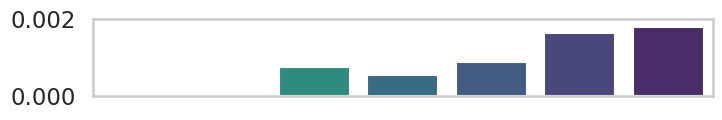

In [29]:
plt.rcParams["figure.figsize"] = (8,1)
bigram = df_all[df_all['context_l']==2][['delta_linear_fit_logLik', 'arch']].groupby('arch').mean()
fullgram = df_all[df_all['context_l']==1000][['delta_linear_fit_logLik', 'arch']].groupby('arch').mean()
df_bar = (bigram - fullgram) # .sort_values(by=['lstm', 'gpt', 'transformer', 'gpt2', 'gpt2_medium', 'gpt2_large', 'gpt2_xl'])
df_bar = pd.DataFrame(df_bar.to_records())
ax = sns.barplot(x='arch', y='delta_linear_fit_logLik', data=df_bar,  palette=[palette[0], palette[2], palette[4], palette[6], palette[7], palette[8], palette[9]], order=['lstm', 'gpt', 'gpt2', 'transformer', 'gpt2_medium', 'gpt2_large', 'gpt2_xl'])
ax.grid(False)
ax.set_ylim([0, 0.002])

plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
plt.legend('',frameon=False)
plt.xlabel('')
plt.ylabel('')

In [30]:
lstm_delta = df_bar[df_bar['arch']=='lstm']['delta_linear_fit_logLik'].to_list()[0]
gpt_delta = df_bar[df_bar['arch']=='gpt']['delta_linear_fit_logLik'].to_list()[0]
transformer_delta = df_bar[df_bar['arch']=='transformer']['delta_linear_fit_logLik'].to_list()[0]
gpt2_delta = df_bar[df_bar['arch']=='gpt2']['delta_linear_fit_logLik'].to_list()[0]
gpt2_md_delta = df_bar[df_bar['arch']=='gpt2_medium']['delta_linear_fit_logLik'].to_list()[0]
gpt2_lg_delta = df_bar[df_bar['arch']=='gpt2_large']['delta_linear_fit_logLik'].to_list()[0]
gpt2_xl_delta = df_bar[df_bar['arch']=='gpt2_xl']['delta_linear_fit_logLik'].to_list()[0]

spearmanr([lstm_delta, gpt_delta, transformer_delta, gpt2_delta, gpt2_md_delta, gpt2_lg_delta, gpt2_xl_delta], [0,1,2,3,4,5,6])

SpearmanrResult(correlation=0.9642857142857145, pvalue=0.0004541491691941689)

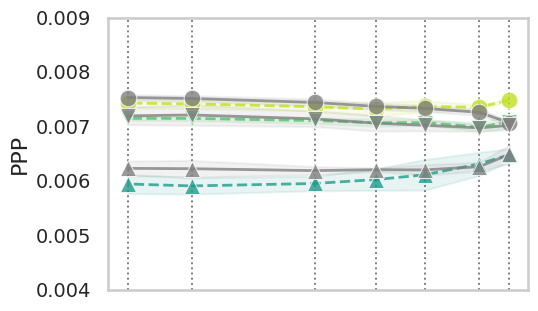

In [32]:
plt.rcParams["figure.figsize"] = (6,4)

cl2avgcl_bunsetsu = {2:1.1867536552688298, 3:2.3106541620551058, 5:4.3765946292305005, 7:6.202073746140852, 10:8.510009514378362, 20:13.139375934447875, 1000:15.55117376361624}
for cl, avg in cl2avgcl_bunsetsu.items():
    plt.axvline(x=avg, linestyle=':', alpha=1, linewidth=1.4, color="gray")

df = pd.read_csv('../surprisals/DC/aggregated.txt')
df = df[(df['context_func']=='delete')]
trans_df = df[df['arch']=='transformer']
lstm_df = df[df['arch']=='lstm']
gpt_df = df[df['arch']=='gpt']

ax = sns.lineplot(x=[cl2avgcl_bunsetsu[l] for l in lstm_df["context_l"]], y =lstm_df["delta_linear_fit_logLik"], alpha=0.8, ci='sd', label='LSTM-xs-Wiki', linestyle="--", color=palette[0], marker="o", markersize=12)
sns.lineplot(x=[cl2avgcl_bunsetsu[l] for l in gpt_df["context_l"]], y =gpt_df["delta_linear_fit_logLik"], alpha=0.8, ci='sd', ax=ax, label='GPT2-xs-Wiki', linestyle="--", color=palette[2], marker="v", markersize=12)
sns.lineplot(x=[cl2avgcl_bunsetsu[l] for l in trans_df["context_l"]], y =trans_df["delta_linear_fit_logLik"], alpha=0.8, ci='sd', ax=ax, label='GPT2-sm-Wiki', linestyle="--", color=palette[4], marker="^", markersize=12)

df = pd.read_csv('../surprisals/DC-vanilla/aggregated.txt')
df = df[(df['context_func']=='delete')]
trans_df = df[df['arch']=='transformer']
lstm_df = df[df['arch']=='lstm']
gpt_df = df[df['arch']=='gpt']

sns.lineplot(x=[cl2avgcl_bunsetsu[l] for l in lstm_df["context_l"]], y =lstm_df["delta_linear_fit_logLik"], alpha=0.8, ci='sd', ax=ax, label='LSTM-xs-Wiki (vanilla)', linestyle="-", color="gray", marker="o", markersize=12)
sns.lineplot(x=[cl2avgcl_bunsetsu[l] for l in gpt_df["context_l"]], y =gpt_df["delta_linear_fit_logLik"], alpha=0.8, ci='sd', ax=ax, label='GPT2-xs-Wiki (vanilla)', linestyle="-", color="gray", marker="v", markersize=12)
sns.lineplot(x=[cl2avgcl_bunsetsu[l] for l in trans_df["context_l"]], y =trans_df["delta_linear_fit_logLik"], alpha=0.8, ci='sd', ax=ax, label='GPT2-sm-Wiki (vanilla)', linestyle="-", color="gray", marker="^", markersize=12)


plt.setp(ax.collections[0], alpha=0.1)
plt.setp(ax.collections[1], alpha=0.1)
plt.setp(ax.collections[2], alpha=0.1)


plt.setp(ax.collections[3], alpha=0.1)
plt.setp(ax.collections[4], alpha=0.1)
plt.setp(ax.collections[5], alpha=0.1)


ax.set_ylabel('Psychometric predictive power',fontsize=16)
ax.tick_params(labelbottom=False,
               labelleft=True,
               labelright=False,
               labeltop=False)

ax.set_ylabel('PPP',fontsize=16)
ax.tick_params(labelbottom=False,
               labelleft=True,
               labelright=False,
               labeltop=False)
ax.set_ylim([0.004, 0.009])

ax.grid(False)
fig = ax.get_figure()
fig.subplots_adjust(left=0.2, bottom=0.2)
fig.patch.set_alpha(0)
plt.yticks(fontsize=14)
plt.legend(bbox_to_anchor=(-0.1, -0.5), loc='lower left', borderaxespad=1.2, fontsize=18, ncol=2)
plt.legend('',frameon=False)
plt.gca().invert_xaxis()

In [38]:
import json
from statistics import mean

context_l = [2, 3, 5, 7, 10, 20]
noise_p = [0.5, 0.25, 0.125, 0.0625]


lp2cl = {}
for l in context_l:
    for p in noise_p:
        data = json.load(open(f'../data/DC/ngram_{str(l)}-contextfunc_lossy-{str(p)}.json'))
        cl = mean([len(c.split(' ')) for doc_id, text in data.items() for c, w in text])
        lp2cl[str(l) + '-' + str(p)] = cl

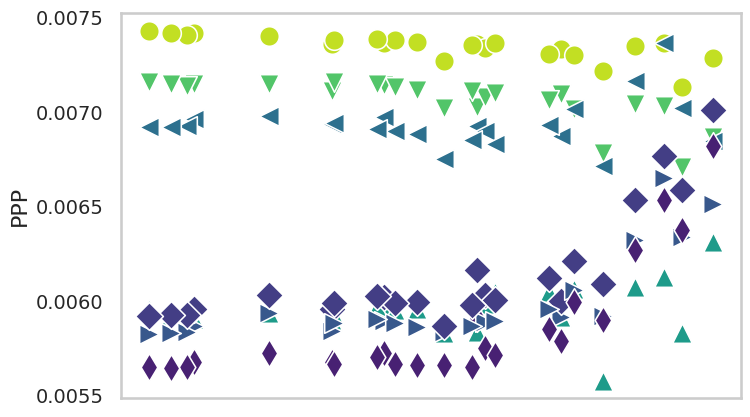

In [42]:
plt.rcParams["figure.figsize"] = (8,5)
palette = sns.color_palette("viridis_r", 10)

df = pd.read_csv('../surprisals/DC/aggregated.txt')
trans_df = df[df['arch']=='transformer']
lstm_df = df[df['arch']=='lstm']
gpt_df = df[df['arch']=='gpt']
lossy_en_df = df[['delta_linear_fit_logLik', 'context_l', 'context_func', 'arch']].groupby(['context_l', 'context_func', 'arch']).describe().sort_values(('delta_linear_fit_logLik', 'mean'), ascending=False)
lossy_en_df = lossy_en_df['delta_linear_fit_logLik'].reset_index()

arch = ['transformer', 'gpt', 'lstm']
arch2color = {'lstm': palette[0], 'gpt': palette[2], 'transformer': palette[4]}
arch2marker = {'transformer': '^', 'lstm': 'o', 'gpt': 'v'}

for l in context_l:
    for p in noise_p:
        for a in arch:
            result = lossy_en_df[(lossy_en_df['context_l'] == l) & (lossy_en_df['context_func']==f'lossy-{str(p)}') & (lossy_en_df['arch']==a)]
            ppp = result['mean'].to_list()[0]
            cl = lp2cl[str(l) + '-' + str(p)]
            sns.scatterplot(x=[cl], y=[ppp], color=arch2color[a], marker=arch2marker[a], s=200)

df = pd.read_csv('../surprisals/DC-hf/aggregated.txt')
lossy_en_df = df[['delta_linear_fit_logLik', 'context_l', 'context_func', 'arch']].groupby(['context_l', 'context_func', 'arch']).describe()
lossy_en_df = lossy_en_df['delta_linear_fit_logLik'].reset_index()

arch = ['gpt2', 'gpt2_medium', 'gpt2_large', 'gpt2_xl']
arch2color = {'gpt2': palette[6], 'gpt2_medium': palette[7], 'gpt2_large': palette[8], 'gpt2_xl': palette[9]}
arch2marker = {'gpt2': '<', 'gpt2_medium': '>', 'gpt2_large': 'D', 'gpt2_xl': 'd'}

for l in context_l:
    for p in noise_p:
        for a in arch:
            result = lossy_en_df[(lossy_en_df['context_l'] == l) & (lossy_en_df['context_func']==f'lossy-{str(p)}') & (lossy_en_df['arch']==a)]
            ppp = result['mean'].to_list()[0]
            cl = lp2cl[str(l) + '-' + str(p)]
            ax = sns.scatterplot(x=[cl], y=[ppp], color=arch2color[a], marker=arch2marker[a], s=200)

ax.set_ylabel('PPP',fontsize=16)
ax.grid(False)
ax.tick_params(labelbottom=False,
               labelleft=True,
               labelright=False,
               labeltop=False)
plt.yticks(fontsize=14)
plt.gca().invert_xaxis()

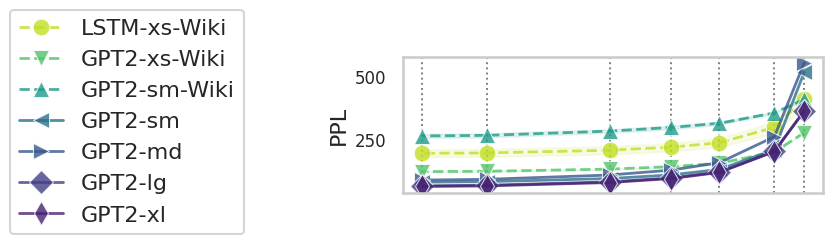

In [45]:
plt.rcParams["figure.figsize"] = (6, 2)
palette = sns.color_palette("viridis_r", 10)


cl2avgcl_bunsetsu = {2:1.1867536552688298, 3:2.3106541620551058, 5:4.3765946292305005, 7:6.202073746140852, 10:8.510009514378362, 20:13.139375934447875, 1000:15.55117376361624}
for cl, avg in cl2avgcl_bunsetsu.items():
    plt.axvline(x=avg, linestyle=':', alpha=1, linewidth=1.4, color="gray")


df = pd.read_csv('../surprisals/DC/aggregated.txt')
df = df[(df['context_func']=='delete')]
trans_df = df[df['arch']=='transformer']
lstm_df = df[df['arch']=='lstm']
gpt_df = df[df['arch']=='gpt']

ax = sns.lineplot(x=[cl2avgcl_bunsetsu[l] for l in lstm_df["context_l"]], y =lstm_df["PPL"], alpha=0.8, ci='sd', label='LSTM-xs-Wiki', linestyle="--", color=palette[0], marker="o", markersize=12)
sns.lineplot(x=[cl2avgcl_bunsetsu[l] for l in gpt_df["context_l"]], y =gpt_df["PPL"], alpha=0.8, ci='sd', ax=ax, label='GPT2-xs-Wiki', linestyle="--", color=palette[2], marker="v", markersize=12)
sns.lineplot(x=[cl2avgcl_bunsetsu[l] for l in trans_df["context_l"]], y =trans_df["PPL"], alpha=0.8, ci='sd', ax=ax, label='GPT2-sm-Wiki', linestyle="--", color=palette[4], marker="^", markersize=12)

plt.setp(ax.collections[0], alpha=0.1)
plt.setp(ax.collections[1], alpha=0.1)
plt.setp(ax.collections[2], alpha=0.1)

df = pd.read_csv('../surprisals/DC-hf/aggregated.txt')
df = df[(df['context_func']=='delete')]
small_df = df[df['arch']=='gpt2']
medium_df = df[df['arch']=='gpt2_medium']
large_df = df[df['arch']=='gpt2_large']
xl_df = df[df['arch']=='gpt2_xl']

sns.lineplot(x=[cl2avgcl_bunsetsu[l] for l in small_df["context_l"]], y=small_df["PPL"], alpha=0.8, ci='sd', ax=ax, label='GPT2-sm', linestyle="-", color=palette[6], marker="<", markersize=12)
sns.lineplot(x=[cl2avgcl_bunsetsu[l] for l in medium_df["context_l"]], y=medium_df["PPL"], alpha=0.8, ci='sd', ax=ax, label='GPT2-md', linestyle="-", color=palette[7], marker=">", markersize=12)
sns.lineplot(x=[cl2avgcl_bunsetsu[l] for l in large_df["context_l"]], y=large_df["PPL"], alpha=0.8, ci='sd', ax=ax, label='GPT2-lg', linestyle="-", color=palette[8], marker="D", markersize=12)
sns.lineplot(x=[cl2avgcl_bunsetsu[l] for l in xl_df["context_l"]], y=xl_df["PPL"], alpha=0.8, ci='sd', ax=ax, label='GPT2-xl', linestyle="-", color=palette[9], marker="d", markersize=12)

sns.set(font_scale=2)
sns.set('talk', 'whitegrid', 'dark',
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})

ax.set_ylabel('Psychometric predictive power',fontsize=16)
ax.tick_params(labelbottom=False,
               labelleft=True,
               labelright=False,
               labeltop=False)
ax.set_ylabel('PPL',fontsize=16)
ax.tick_params(labelbottom=False,
               labelleft=True,
               labelright=False,
               labeltop=False)

ax.grid(False)
plt.yticks(fontsize=12)
fig = ax.get_figure()
fig.subplots_adjust(left=0.2, bottom=0.2)
fig.patch.set_alpha(0)
plt.legend(bbox_to_anchor=(-1, -0.5), loc='lower left', borderaxespad=1.2, fontsize=16, ncol=1)
plt.gca().invert_xaxis()


Text(0, 0.5, 'PPP')

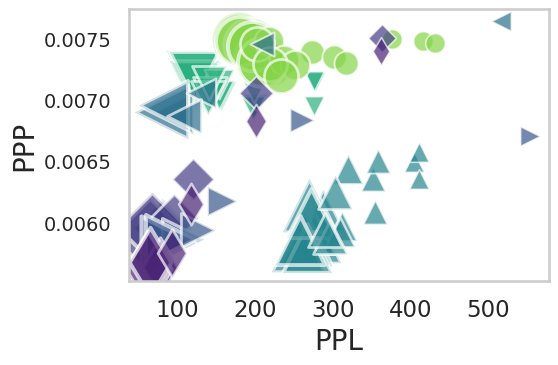

In [46]:
plt.rcParams["figure.figsize"] = (6, 4)
arch2color = {'transformer': 4, 'lstm': 0, 'gpt': 2}
context2size = {'2': 200, '3': 300, '5': 450, '7': 600, '10': 900, '20': 1250, '1000': 1500}
arch2marker = {'transformer': '^', 'lstm': 'o', 'gpt': 'v'}
arch2color = {'transformer': 5, 'lstm': 1, 'gpt': 3}
df = pd.read_csv('../surprisals/DC/aggregated.txt')
df = df[(df['context_func']=='delete')]
for k, r in df.iterrows():
    if r['PPL'] < 1000000:
        sns.scatterplot(x=[r['PPL']], y=[r['delta_linear_fit_logLik']], 
                    marker=arch2marker[r['arch']], s=context2size[str(r['context_l'])], 
                    color=palette[arch2color[r['arch']]], alpha=0.7)
df2 = df
trans_df = df[df['arch']=='transformer']
lstm_df = df[df['arch']=='lstm']
gpt_df = df[df['arch']=='gpt']

arch2color = {'gpt2': 6, 'gpt2_medium': 7, 'gpt2_large': 8, 'gpt2_xl': 9}
arch2marker = {'gpt2': '<', 'gpt2_medium': '>', 'gpt2_large': 'D', 'gpt2_xl': 'd'}

df = pd.read_csv('../surprisals/DC-hf/aggregated.txt')
df = df[(df['context_func']=='delete')]
for k, r in df.iterrows():
    if r['PPL'] < 1000000:
        ax = sns.scatterplot(x=[r['PPL']], y=[r['delta_linear_fit_logLik']], 
                    marker=arch2marker[r['arch']], s=context2size[str(r['context_l'])], 
                    color=palette[arch2color[r['arch']]], alpha=0.7)
df3 = df
small_df = df[df['arch']=='gpt2']
medium_df = df[df['arch']=='gpt2_medium']
large_df = df[df['arch']=='gpt2_large']
xl_df = df[df['arch']=='gpt2_xl']

fig = ax.get_figure()
fig.subplots_adjust(left=0.2, bottom=0.2)
fig.patch.set_alpha(0)
plt.grid(False)
plt.yticks(fontsize=14)
plt.xlabel('PPL',fontsize=20)
plt.ylabel('PPP',fontsize=20)

In [47]:
pd.concat([df1, df2])[['PPL', 'delta_linear_fit_logLik']].corr()

,PPL,delta_linear_fit_logLik
PPL,1.000000,-0.384903
delta_linear_fit_logLik,-0.384903,1.000000


In [53]:
import glob
from statistics import mean


files = glob.glob('../surprisals/DC/arch*ngram_2-contextfunc_delete/**/residuals.txt', recursive=True)
files.extend(glob.glob('../surprisals/DC-hf/arch*ngram_2-contextfunc_delete/residuals.txt', recursive=True))
dfs = []
for i, file in enumerate(files):
    if i == 0:
        df = pd.read_csv(file)
    else:
        df = pd.read_csv(file)[['residual', 'surprisals_sum_raw']]
    dfs.append(df)
df_close = pd.concat(dfs, axis=1)

files = glob.glob('../surprisals/DC/arch*ngram_1000-contextfunc_delete/**/residuals.txt', recursive=True)
files.extend(glob.glob('../surprisals/DC-hf/arch*ngram_1000-contextfunc_delete/residuals.txt', recursive=True))
dfs = []
for i, file in enumerate(files):
    if i == 0:
        df = pd.read_csv(file)
    else:
        df = pd.read_csv(file)[['residual', 'surprisals_sum_raw']]
    dfs.append(df)
df_far = pd.concat(dfs, axis=1)
df_en = pd.read_csv('../data/DC/all.txt.annotation.filtered.csv.data4modeling', delimiter="\t")
df_en['diff_residual'] = (df_close['residual'] - df_far['residual']).T.mean().tolist()
df_en = df_en[df_en['tokenN_in_sent']>12]

13
13


We found some datapoints are unintentionally excluded in the paper's results.  
We fixed it, and the exact values are slightly chaged from papers (conclusions are consistent).  

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

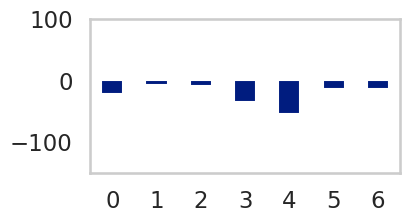

In [56]:
content_pos = [
    "JJ",
    "JJR",
    "JJS",
    "NN",
    "NNP",
    "NNPS",
    "NNS",
    "RB",
    "RBR",
    "RBS",
    "VB",
    "VBD",
    "VBG",
    "VBN",
    "VBP",
    "VBZ",
]

key = 'avg_locality'
df_dep = df_en[df_en['pos'].isin(content_pos)]
df_dep = df_dep[[key, 'diff_residual']].copy()
df_dep[key] = df_dep[key].astype('int')
quantile = int(df_dep[key].quantile(0.95))
df_dep = df_dep[df_dep[key]<quantile]
df_dep.groupby(key).mean().plot(kind="bar", figsize=(4,2))
plt.legend('',frameon=False)
plt.ylim(-150,100)
plt.xlabel('')
plt.grid(False)
plt.xticks(rotation=0)

nmod_dist
788
case_dist
334
det_dist
157
nsubj_dist
1714
mark_dist
1826
advmod_dist
381
aux_dist
100
cop_dist
134
advcl_dist
825
parataxis_dist
153
nsubjpass_dist
342
discourse_dist
172


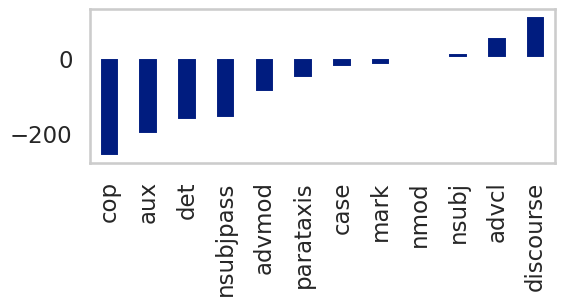

In [61]:
ax = None
markers = ["o", "^", "v", "<", ">", "d", "D", "+", "x", "*", "h", "H"]
i = 0

dep_rel_list = [
"nmod_dist",
"case_dist",
"det_dist",
"nsubj_dist",
"amod_dist",
"mark_dist",
"advmod_dist",
"dobj_dist",
"conj_dist",
"aux_dist",
"cc_dist",
"compound_dist",
"acl_dist",
"cop_dist",
"advcl_dist",
"ccomp_dist",
"xcomp_dist",
"name_dist",
"neg_dist",
"auxpass_dist",
"parataxis_dist",
"nummod_dist",
"nsubjpass_dist",
"appos_dist",
"expl_dist",
"mwe_dist",
"discourse_dist",
"csubj_dist",
]

dep2lce = {}
dep2locality = {}
data = []
for dep in dep_rel_list:
    key=dep
    df_dep = df_en.copy()
    df_dep = df_dep[df_dep[key]<200]
    df_dep[key] = df_dep[key].astype('int')
    df_dep_long = df_dep[df_dep[key]>4]
    df_dep_short = df_dep[(df_dep[key]<3) & (df_dep[key]>0)]
    if len(df_dep_long) < 100:
        continue
    print(key)
    print(len(df_dep_long))
    dep2lce[key+"_long"] = df_dep_long['diff_residual'].mean()
    dep2locality[key+"_long"] = df_dep_long[key].mean()
    data.append(df_dep_long['diff_residual'].values.tolist())


keys = map(lambda x: x[0].replace('_dist_long', ''), dep2lce.items())
values = map(lambda x: x[1], dep2lce.items())
localities = map(lambda x: x[1], dep2locality.items())

pd.DataFrame.from_dict({'pos': keys, 'diff_residual': values, 'locality': localities}).sort_values(by='diff_residual').plot(kind="bar", x='pos', y='diff_residual', figsize=(6,2))
plt.legend('',frameon=False)
plt.xlabel('')
plt.grid(False)

In [60]:
print(f_oneway(data[0], data[1], data[2], data[3], data[4], data[5], data[6], data[7], data[8], data[9], data[10], data[11]))
print(ttest_ind(data[11], data[7]))

F_onewayResult(statistic=2.3856046968601072, pvalue=0.006040719423798739)
Ttest_indResult(statistic=2.8661671458008455, pvalue=0.004444665322317245)
